In [7]:
pip install tensorflow


In [8]:
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
import tensorflow as tf

In [9]:
df = pd.read_csv('cleaned_variant_data_final.csv', dtype={'Chromosome': str}, low_memory=False)
df.head()


,Type,Name,GeneSymbol,Origin,Chromosome,Start,ReviewStatus,NumberSubmitters,Grouped_ClinicalSignificance,ReviewConfidence,...,type_Insertion,type_Inversion,type_Microsatellite,type_Tandem duplication,type_Translocation,type_Variation,type_copy number gain,type_copy number loss,type_protein only,type_single nucleotide variant
0,Indel,NM_014855.3(AP5Z1):c.80_83delinsTGCTGTAAACTGTA...,AP5Z1,germline;unknown,7,4820844,"criteria provided, multiple submitters, no con...",3,Pathogenic,0.9,...,False,False,False,False,False,False,False,False,False,False
1,Indel,NM_014855.3(AP5Z1):c.80_83delinsTGCTGTAAACTGTA...,AP5Z1,germline;unknown,7,4781213,"criteria provided, multiple submitters, no con...",3,Pathogenic,0.9,...,False,False,False,False,False,False,False,False,False,False
2,single nucleotide variant,NM_017547.4(FOXRED1):c.694C>T (p.Gln232Ter),FOXRED1,germline,11,126145284,"criteria provided, multiple submitters, no con...",6,Pathogenic,0.9,...,False,False,False,False,False,False,False,False,False,True
3,single nucleotide variant,NM_017547.4(FOXRED1):c.694C>T (p.Gln232Ter),FOXRED1,germline,11,126275389,"criteria provided, multiple submitters, no con...",6,Pathogenic,0.9,...,False,False,False,False,False,False,False,False,False,True
4,single nucleotide variant,NM_017547.4(FOXRED1):c.1289A>G (p.Asn430Ser),FOXRED1,germline,11,126147412,"criteria provided, single submitter",2,Likely pathogenic,0.7,...,False,False,False,False,False,False,False,False,False,True


In [10]:
# Drop unwanted columns
columns_to_drop = ['Name', 'ReviewStatus', 'Type', 'GeneSymbol']
df = df.drop(columns=columns_to_drop)

# Check if the columns were dropped
print(df.head())


             Origin Chromosome      Start  NumberSubmitters  \
0  germline;unknown          7    4820844                 3   
1  germline;unknown          7    4781213                 3   
2          germline         11  126145284                 6   
3          germline         11  126275389                 6   
4          germline         11  126147412                 2   

  Grouped_ClinicalSignificance  ReviewConfidence  is_frameshift  \
0                   Pathogenic               0.9              0   
1                   Pathogenic               0.9              0   
2                   Pathogenic               0.9              0   
3                   Pathogenic               0.9              0   
4            Likely pathogenic               0.7              0   

   is_splice_site  is_missense  is_nonsense  ...  type_Insertion  \
0               0            0            0  ...           False   
1               0            0            0  ...           False   
2             

In [14]:
df.shape

(6282233, 26)

In [15]:
sampled_df = df.sample(frac=0.1, random_state=42)  # Set random_state for reproducibility

sampled_df.reset_index(drop=True, inplace=True)

In [16]:
sampled_df.shape

(628223, 26)

In [17]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Convert 'Chromosome' column to binary encoding
chromosome_encoder = LabelEncoder()
sampled_df['Chromosome_encoded'] = chromosome_encoder.fit_transform(sampled_df['Chromosome'])

# Convert the encoded values to binary strings (without leading zeros)
sampled_df['Chromosome_encoded'] = sampled_df['Chromosome_encoded'].apply(lambda x: format(x, 'b'))

# Drop the original 'Chromosome' column and the newly added 'Chromosome_encoded' column
sampled_df = sampled_df.drop(columns=['Chromosome', 'Chromosome_encoded'])

# Check the transformed DataFrame
print(sampled_df.head())


     Origin      Start  NumberSubmitters Grouped_ClinicalSignificance  \
0  germline  121125702                 1                   Pathogenic   
1  germline    1226611                 1       Uncertain significance   
2  germline   70448098                 1                       Benign   
3  germline    5755600                 1                Likely benign   
4  germline   15931955                 2       Uncertain significance   

   ReviewConfidence  is_frameshift  is_splice_site  is_missense  is_nonsense  \
0               0.7              1               0            0            0   
1               0.7              0               0            1            0   
2               0.7              0               1            0            0   
3               0.7              0               0            0            0   
4               0.9              0               0            1            0   

   is_synonymous  ...  type_Insertion  type_Inversion  type_Microsatellite  \
0 

In [18]:
# Set your target column here
target_col = 'Grouped_ClinicalSignificance'

# Separate features and target
X = sampled_df.drop(columns=[target_col])
y = sampled_df[target_col]

# Convert categorical features to dummy variables (One-Hot Encoding)
X = pd.get_dummies(X)

# Encode labels (target) using LabelEncoder
le = LabelEncoder()
y_encoded = le.fit_transform(y)
num_classes = len(np.unique(y_encoded))

# Scale features using StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Check the shape after preprocessing
print(f"Features shape: {X_scaled.shape}")
print(f"Target shape: {y_encoded.shape}")



Features shape: (628223, 127)
Target shape: (628223,)


In [19]:
print(df.head())

             Origin Chromosome      Start  NumberSubmitters  \
0  germline;unknown          7    4820844                 3   
1  germline;unknown          7    4781213                 3   
2          germline         11  126145284                 6   
3          germline         11  126275389                 6   
4          germline         11  126147412                 2   

  Grouped_ClinicalSignificance  ReviewConfidence  is_frameshift  \
0                   Pathogenic               0.9              0   
1                   Pathogenic               0.9              0   
2                   Pathogenic               0.9              0   
3                   Pathogenic               0.9              0   
4            Likely pathogenic               0.7              0   

   is_splice_site  is_missense  is_nonsense  ...  type_Insertion  \
0               0            0            0  ...           False   
1               0            0            0  ...           False   
2             

In [20]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (
    Input, GRU, Dense, Attention, Dropout,
    GlobalAveragePooling1D, BatchNormalization,
    Permute, Multiply, Softmax, Concatenate
)

# Input layer: treat features as a sequence of timesteps with 1 value each
input_layer = Input(shape=(X_scaled.shape[1], 1))

# GRU layer (small but effective)
gru_output = GRU(32, return_sequences=True)(input_layer)
gru_output = BatchNormalization()(gru_output)

# Simple Attention mechanism
attention_weights = Dense(1, activation='tanh')(gru_output)
attention_weights = Softmax(axis=1)(attention_weights)
context_vector = Multiply()([gru_output, attention_weights])
context_vector = GlobalAveragePooling1D()(context_vector)

# Dropout and dense layers for classification
x = Dropout(0.3)(context_vector)
x = Dense(64, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)
x = Dense(32, activation='relu')(x)

# Output layer
output_layer = Dense(num_classes, activation='softmax')(x)

# Compile model
model = Model(inputs=input_layer, outputs=output_layer)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Summary
model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 127, 1)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ gru (GRU)           │ (None, 127, 32)   │      3,360 │ input_layer[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 127, 32)   │        128 │ gru[0][0]         │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 127, 1)    │         33 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ softmax (Softmax)   │ (None, 127, 1)    │          0 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multiply (Multiply) │ (None, 127, 32)   │          0 │ batch_normalizat… │
│                     │                   │            │ softmax[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 32)        │          0 │ multiply[0][0]    │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 32)        │          0 │ global_average_p… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 64)        │      2,112 │ dropout[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 64)        │        256 │ dense_1[0][0]     │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 64)        │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 32)        │      2,080 │ dropout_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 7)         │        231 │ dense_2[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 8,200 (32.03 KB)

 Trainable params: 8,008 (31.28 KB)

 Non-trainable params: 192 (768.00 B)

In [21]:
X_scaled_reshaped = X_scaled.reshape((X_scaled.shape[0], X_scaled.shape[1], 1))

In [22]:
from sklearn.model_selection import train_test_split
import numpy as np

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

# Reshape the features for GRU input: (samples, timesteps, features)
X_train_reshaped = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_reshaped = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Check the shape of the reshaped data
print(f"X_train_reshaped shape: {X_train_reshaped.shape}")
print(f"X_test_reshaped shape: {X_test_reshaped.shape}")


X_train_reshaped shape: (502578, 127, 1)
X_test_reshaped shape: (125645, 127, 1)


In [25]:
# Train the model
history = model.fit(
    X_train_reshaped, y_train,
    epochs=10,
    batch_size=132,
    validation_data=(X_test_reshaped, y_test)
)


Epoch 1/10
3808/3808 ━━━━━━━━━━━━━━━━━━━━ 280s 74ms/step - accuracy: 0.8168 - loss: 0.5880 - val_accuracy: 0.7395 - val_loss: 0.7132
Epoch 2/10
3808/3808 ━━━━━━━━━━━━━━━━━━━━ 274s 72ms/step - accuracy: 0.8207 - loss: 0.5717 - val_accuracy: 0.8171 - val_loss: 0.5764
Epoch 3/10
3808/3808 ━━━━━━━━━━━━━━━━━━━━ 275s 72ms/step - accuracy: 0.8221 - loss: 0.5663 - val_accuracy: 0.8188 - val_loss: 0.6166
Epoch 4/10
3808/3808 ━━━━━━━━━━━━━━━━━━━━ 276s 72ms/step - accuracy: 0.8224 - loss: 0.5654 - val_accuracy: 0.8247 - val_loss: 0.5578
Epoch 5/10
3808/3808 ━━━━━━━━━━━━━━━━━━━━ 275s 72ms/step - accuracy: 0.8224 - loss: 0.5623 - val_accuracy: 0.8246 - val_loss: 0.5600
Epoch 6/10
3808/3808 ━━━━━━━━━━━━━━━━━━━━ 271s 71ms/step - accuracy: 0.8227 - loss: 0.5598 - val_accuracy: 0.8251 - val_loss: 0.5520
Epoch 7/10
3808/3808 ━━━━━━━━━━━━━━━━━━━━ 278s 73ms/step - accuracy: 0.8241 - loss: 0.5570 - val_accuracy: 0.8272 - val_loss: 0.5529
Epoch 8/10
3808/3808 ━━━━━━━━━━━━━━━━━━━━ 278s 73ms/step - accuracy: 

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


In [27]:
y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=1)  # Convert softmax probabilities to class labels


3927/3927 ━━━━━━━━━━━━━━━━━━━━ 37s 9ms/step


In [28]:
# Calculate accuracy, precision, recall, and F1 score
accuracy = accuracy_score(y_test, y_pred_classes)
precision = precision_score(y_test, y_pred_classes, average='weighted')  # Use 'weighted' for multi-class
recall = recall_score(y_test, y_pred_classes, average='weighted')
f1 = f1_score(y_test, y_pred_classes, average='weighted')

# Print the metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


Accuracy: 0.8259
Precision: 0.8141
Recall: 0.8259
F1 Score: 0.8152


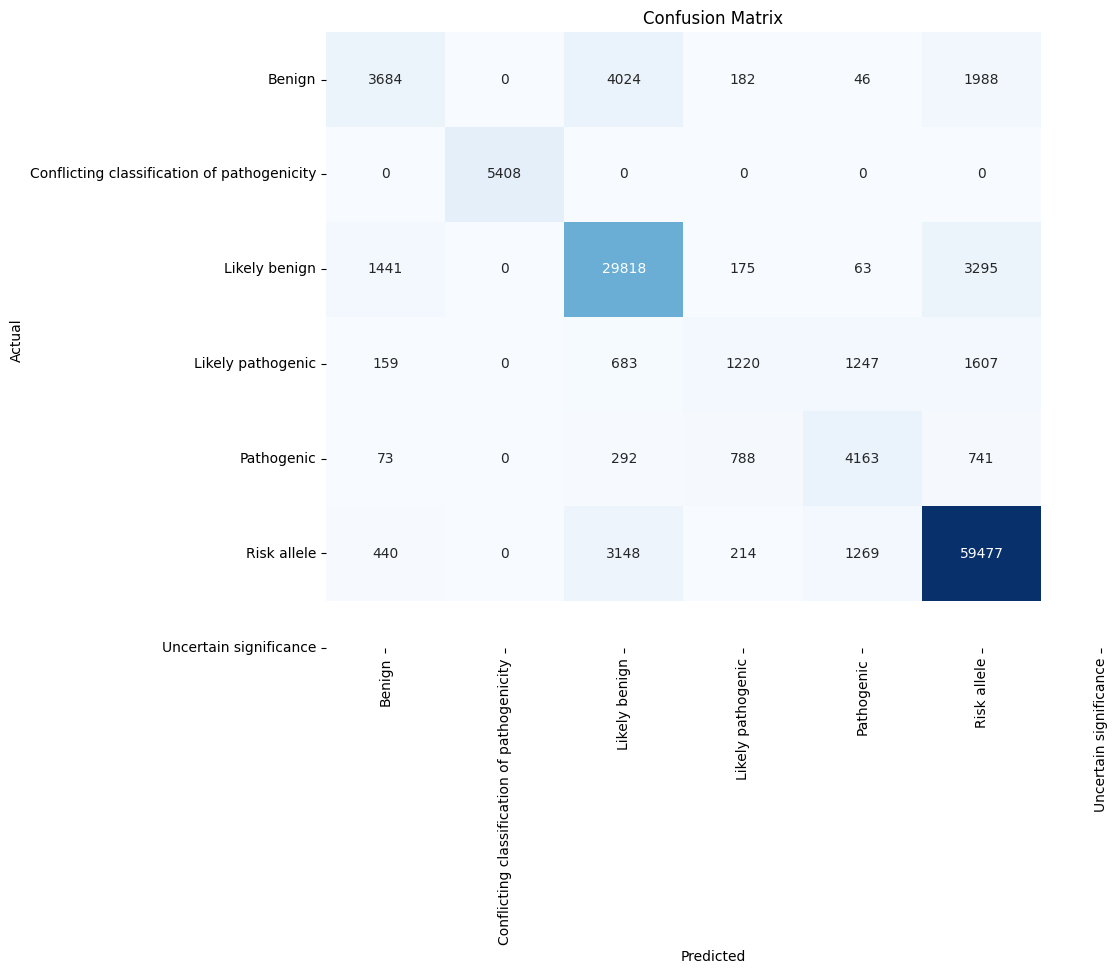

In [31]:
# Create confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Plot confusion matrix using Seaborn heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=le.classes_, yticklabels=le.classes_, cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
